# DSCI 521: Methods for analysis and interpretation <br> Chapter 5: Data transformation, and analysis of functions

## Exercises
Note: numberings refer to the main notes.

#### 5.0.2.1 Exercise: defining a function of multiple data dimensions
In the manner of __Sec. 5.0.1.1__, re-define `linear` as a general linear function (like $g(x,y,z)$ in __5.0.2__) that 1) accepts a vector (array) of inputs, a vector of slopes, and an intercept; 2) checks to make sure there are as many inputs as there are slopes; and 3) computes the linear result.

_Solution._ Since we're assuming an array input, a nice way to get the weights to multiple their feature-column, i.e., 'dimension' values is through an inner product, treating `x` as amatrix and `m` a vector. From this, we only need to add the intercept, which is simply a broadcast operation.

In [1]:
import numpy as np

def linear(x, m, b):
    if x.shape[1] == m.shape[0]:
        return x.dot(m) + b
    else:
        return "bad input"
    
ex = np.array([
    [1,2,3],
    [9,8,7],
    [5,5,5]
])

em = np.array([3,2,1])

linear(ex, em, 27)

array([37, 77, 57])

#### 5.0.2.2 Exercise: defining a general polynomial
The task here again is to generalize the function `linear` from __Sec. 5.0.1.1__, but now differently, as a polynomial of a single dimension. This new function should be called `poly` and accept a single input $x$ on which to perform the polynomial calculation, a vector (array) of coefficients $c$, and an intercept. The function should then 1) determine the degree of the polynomial from the number of coefficients (assumed to be in a fixed order, i.e., low to high), and 2) compute the polynomial output value.

_Solution._ While only assuming 1-dimension input, for our `poly` function we had to take a bit more care in using the power of `x`, `k`, to compute the coefficient index, since it was nice (from a user input perspective) to be able to input a list of coefficeints in reading order, i.e., high-`k` to low-`k` from left to right.

In [5]:
def poly(x, c, c0):
    n = len(c)
    output = c0
    for k in range(1, n+1):
        output += c[n-k]*(x ** k)
        
    return output

poly(np.array([1,2,3,4,5,6]), np.array([-9,1,5]), 0)

array([   -3,   -58,  -219,  -540, -1075, -1878])

#### 5.0.3.1 Challenge exercise: defining a general polynomial of multiple dimensions
To define a general polynomial of multiple dimensions, we'll specify only the non-zero coefficients for specific terms. To complete this exercise, have your function accept 1) a vector of input values and a 2) dictionary of coefficients such that each key is a tuple referring to the relevant powers of inputs and each value is the corresponding coefficient. The function should be called `multi_poly` and output the real-valued result. So for the relatively sparse (degree-7) polynomial:

$$h(x,y,z) = 3x^2yz^4 +  8xy^2z^3 + 2yz^4 + 7x^2y +5$$

the parameter-setting dictionary required as a second argument would be:
```
{
    (2,1,4): 3,
    (1,2,3): 8,
    (0,1,4): 2,
    (2,1,0): 7,
    (0,0,0): 5
}
```

In [5]:
# code here

#### 5.0.3.3 Exercise: defining the logistic function
The [_logistic function_](https://en.wikipedia.org/wiki/Logistic_function) is a special mathematical function based on the exponential function that is used widely in neural network applications. It's a common "S" shape (sigmoid curve), with equation:

$$
f(x)= \frac {L}{1+e^{-k(x-x_{0})}},
$$

where

- $x_0$ = the x-value of the function's midpoint,
- $L$ = the function's maximum value, and
- $k$ = the steepness of the 's'.

Your job here is to create a (computational) implementation of the logistic function, `logistic(x, k)`, accepting a values for $x$ and the above parameters, but with presets: $k = 1$, $L=1$, and $x_0 = 0$.

_Solution._ Since we have access to the `np.exp()` function, this solution is fairly straightforward, just taking care to ensure the order of operations is appropriate. Since the function is a `numpy` function, flexibility for `x` being an array basically comes for free. To check our work, we can visualize to see that we get the characteristic 'S' shape.

In [12]:
def logistic(x, L = 1, k = 1, x0 = 0):
    return L/(1 + np.exp(-k*(x - x0)))

logistic(np.array([-5,-4,-3,-2,-1,1,2,4,5, 3000000000000000]))

array([0.00669285, 0.01798621, 0.04742587, 0.11920292, 0.26894142,
       0.73105858, 0.88079708, 0.98201379, 0.99330715, 1.        ])

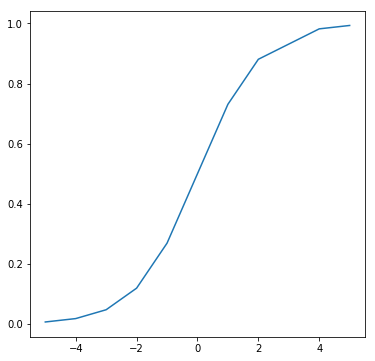

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

x = np.array([-5,-4,-3,-2,-1,1,2,4,5])

fig = plt.figure(figsize = (6,6))

plt.plot(x, logistic(x))

#### 5.0.5.3 Exercise: functionalizing products by logarithmic summation
Write a function called `safe_product()` that takes an arbitrary list of _positive_ numbers and computes their product by completing the sum of logarithms routine outlined above. If any of the numbers to be multiplied are zero, the function should detect this and just `return  0` immediately. For any of the numbers that are negative, they should be counted and negated before taking any logarithms. The final output should then `return product` if there were an even number of negative numbers, and `return -product` if there were an odd number.

In [13]:
## code here

#### 5.1.2.2 Exercise: computing derivative approximations
Compute derivative approximations using `difference_quotient` for the `square` and `linear` functions (assuming default coefficients) for a number of different values of `x` and `h`. Do these approximations appear to change as these values are adjusted? How does `h` appear to affect the approximations at a _given_ value?

In [19]:
## code here

#### 5.1.2.4 Exercise: Making sense of derivatives
Considering the two applications of the difference quotient in __Secs. 5.1.2.1&ndash;5.1.2.3__, make sense of their ouput. Do the derivative rules (above) suggest these approximations were accurate? Discuss!

_Response._

#### 5.1.2.5 Exercise: calculating logistic derivatives
Using the above derivative rules, show that the derivative of the _standard_ logistic function (i.e., with the presets requested in __Sec. 5.0.3.3__) has the following special property: 

$$f'(x) = f(x)(1 - f(x))$$

and use this property to define a (computing) function that calculates derivatives from the logistic function requested in __Sec. 5.0.3.3__.

_Response._

In [20]:
## code here

#### 5.1.3.14 Exercise: more gradient descent implementations
Gradient descent and the logistic function go hand-in-hand in many application contexts. Set up an implementation of gradient descent (as in __Sec. 5.1.3.8__) setting 'true' parameters and 'noisy data' for the logistic function (as requested in __Sec. 5.0.3.3__). Run it using both of the batch and and stochastic implementations, but utilize the gradient approximations. Which implementation works better, faster? Did the same set of step sizes work?

In [46]:
## code here